In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/one-second-splits/train_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/one-second-splits/train_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/one-second-splits/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/one-second-splits/test_labels_real.pkl', 'rb')


In [19]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [20]:
# confirm that these are correct 
len(test_samples) + len(X)

4974

### LSTM 

In [26]:
X[0].shape

(128, 44)

In [27]:
import tensorflow as tf
import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(128, 44), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(2, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 64)           27904     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 130       
Total params: 65,218
Trainable params: 65,218
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
history = model.fit(X, y, epochs=250)

Epoch 1/250
140/140 [==============================] - 10s 12ms/step - loss: 0.5074 - accuracy: 0.7603
Epoch 2/250
140/140 [==============================] - 1s 10ms/step - loss: 0.3532 - accuracy: 0.8798
Epoch 3/250
140/140 [==============================] - 2s 11ms/step - loss: 0.3718 - accuracy: 0.8682
Epoch 4/250
140/140 [==============================] - 2s 11ms/step - loss: 0.3130 - accuracy: 0.8881
Epoch 5/250
140/140 [==============================] - 2s 11ms/step - loss: 0.3287 - accuracy: 0.8799
Epoch 6/250
140/140 [==============================] - 1s 11ms/step - loss: 0.3388 - accuracy: 0.8839
Epoch 7/250
140/140 [==============================] - 2s 11ms/step - loss: 0.3536 - accuracy: 0.8806
Epoch 8/250
140/140 [==============================] - 2s 11ms/step - loss: 0.3055 - accuracy: 0.8837
Epoch 9/250
140/140 [==============================] - 1s 11ms/step - loss: 0.3694 - accuracy: 0.8586
Epoch 10/250
140/140 [==============================] - 1s 11ms/step - loss: 0.34

In [31]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


In [32]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [33]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

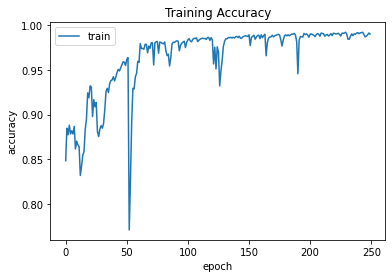

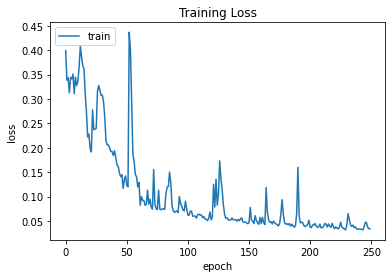

In [34]:
plot_training(history_dict)

In [35]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

16/16 - 1s - loss: 0.0781 - accuracy: 0.9880
Test accuracy: 0.9879518151283264


In [36]:
predictions = model.predict_classes(test_samples) # generates a list of predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

In [38]:
correct = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [39]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

0.9879518072289156

In [40]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 98.8%


In [42]:
c = 0
for elem in test_labels:
  if elem == 1:
    c += 1
print(c)

249


Now on the speech samples: 

In [43]:
speech_correct = 0
for i in range(len(test_labels[:249])):
    if predictions[i] == test_labels[i]:
      speech_correct += 1

In [44]:
speech_correct/len(test_labels[:249])

0.9879518072289156

Wow! 98.7% on the speech samples! 

In [45]:
no_speech_correct = 0
for i in range(len(test_labels[249:])):
    if predictions[i] == test_labels[i]:
      no_speech_correct += 1

In [46]:
print(no_speech_correct/249)

0.9879518072289156


Same with no speech samples. Looking above, only three wrong for both categories and six wrong total. 

### Confusion matrix and classification report

In [47]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(test_labels, predictions)

In [49]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[246   3]
 [  3 246]]


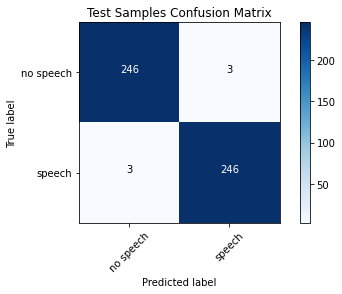

In [50]:
plot_cm(cm, ['no speech','speech'], title='Test Samples Confusion Matrix')

In [51]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions, target_names=['no speech','speech']))

              precision    recall  f1-score   support

   no speech       0.99      0.99      0.99       249
      speech       0.99      0.99      0.99       249

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498

